# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/dialoGPT_REINFORCE_dailyDialog.yml'

loaded_info = parse_config_for_analysis(config_path)


/Users/spyros/UvA_AI/rational-dialog-model/utils/analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


0


Using custom data configuration default
Reusing dataset daily_dialog (/Users/spyros/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1781b6e74e1ba5c8b5bcbf7c210656d54474ec1a9b3feadc88a4fc229be2145c)


load pretrained_model:  ./finetuning/saved_models/dialoGPT-daily_dialog-small
load pretrained_model:  ./final_models/dialoGPT_dailyDialog_finetuned.pt


GPU available: False, used: False
TPU available: False, using: 0 TPU cores


pad token id: 50258


## Perplexity and Accuracy

In [3]:

lm_RE = loaded_info["lightning_language_model_RE"].to('cpu')#.to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to('cpu')#.to("cuda")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]



In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|          | 0/66 [00:00<?, ?it/s]/Users/spyros/opt/miniconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 66/66 [02:53<00:00,  2.63s/it]


{'mean_acc': {'mean': 0.2712234820831905, 'std': 0.0}, 'mean_perplexity': {'mean': 112.46318461678241, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.7229092121124269, 'std': 0.0}}
{'mean_acc': 0.2515136631149235, 'mean_perplexity': 158.12114484382397, 'mean_mask_percentage': 0}


## Change in perplexity

In [ ]:
# ### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=2)
# change_in_perplexity

## Distribution of mask

In [5]:
from utils.analysis import rational_analysis

rational_distributions = rational_analysis(lm_RE, dataloader_test, greedy=False)
print(rational_distributions)

{'abs_average': 0.0, 'rel_average': 0.0, 'abs_pos_count': Counter({2.0: 320, 3.0: 263, 5.0: 250, 7.0: 248, 8.0: 242, 4.0: 236, 6.0: 235, 9.0: 232, 10.0: 230, 15.0: 229, 14.0: 226, 13.0: 223, 11.0: 219, 17.0: 218, 12.0: 210, 16.0: 210, 18.0: 208, 19.0: 203, 21.0: 201, 22.0: 201, 27.0: 201, 20.0: 200, 23.0: 193, 24.0: 193, 25.0: 190, 31.0: 188, 30.0: 184, 26.0: 180, 32.0: 180, 28.0: 178, 29.0: 178, 33.0: 178, 34.0: 177, 39.0: 177, 40.0: 174, 35.0: 173, 37.0: 172, 36.0: 167, 43.0: 165, 45.0: 164, 41.0: 163, 42.0: 161, 44.0: 161, 1.0: 159, 38.0: 156, 47.0: 156, 46.0: 155, 50.0: 151, 52.0: 149, 48.0: 146, 49.0: 144, 54.0: 143, 51.0: 142, 56.0: 142, 59.0: 139, 55.0: 136, 57.0: 136, 53.0: 131, 66.0: 130, 58.0: 128, 63.0: 128, 60.0: 125, 61.0: 124, 62.0: 124, 64.0: 121, 65.0: 119, 71.0: 119, 67.0: 117, 73.0: 115, 70.0: 114, 69.0: 113, 74.0: 113, 68.0: 112, 76.0: 112, 72.0: 109, 80.0: 107, 79.0: 106, 75.0: 104, 77.0: 104, 86.0: 104, 85.0: 103, 78.0: 102, 83.0: 101, 88.0: 100, 82.0: 99, 87.0: 93

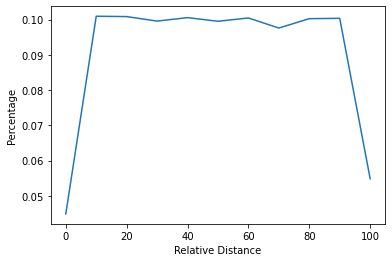

In [6]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

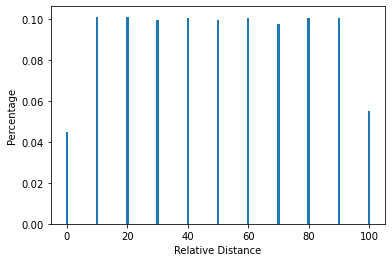

In [7]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

In [ ]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.bar(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [8]:
examples = ["How are you doing? [SEP]", "What did you do today? [SEP]", "How's work? [SEP]", "Would you like some coffee? [SEP]"]

In [9]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [10]:
from utils.analysis import pretty_print_completed_dialogues

In [11]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] are you doing? [MASK] ------>  I'm very reliable. [SEP]
[MASK] are you doing? [SEP] I'm very reliable. [MASK] ------>  Good, thanks. I know. I'm not funny? [SEP]
[MASK] are you doing? [SEP] I'm very reliable. [SEP] Good[MASK] thanks. I know. I'm not funny? [MASK] ------>  Well, we are welcome. [SEP]
[MASK] are you doing? [SEP] I'm very reliable. [SEP] Good[MASK] thanks. I know. I'm not funny? [MASK] Well[MASK] we are welcome. [MASK] ------>  Yes? [SEP]
What did you do today? [MASK] ------>  What are a trick or watch this company usually do that you feel better. I'll take a lot[SEP]
What did you do today? [SEP] What are a trick or watch[MASK] company usually do that you[MASK] better. I'll take a lot[MASK] ------>  I'm very troublesome. [SEP]
What did you do today? [SEP] What are a trick or watch[MASK] company usually do that you[MASK] better. I'll take a lot[MASK] I'm very troublesome. [MASK] ------>  Well, we have a lot. [SEP]
[MASK]'s[MASK]? [MASK] ------

In [12]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
[MASK] are[MASK] doing? [SEP] ------>  Alright. [SEP]
How are you doing[MASK] [SEP][MASK][MASK] [SEP] ------>  Thank you think it. [SEP]
How are you doing[MASK] [MASK] Alright. [SEP] Thank[MASK] think[MASK]. [MASK] ------>  That's the most important. See you. I'm not, and weaknesses? [SEP]
How are you[MASK]? [MASK] Alright[MASK] [MASK] Thank you think it. [MASK] That's the most important. See you[MASK] I'm not[MASK] and weaknesses? [MASK] ------>  I'm very troublesome. [SEP]
What did you do today[MASK] [SEP] ------>  You'll be very grateful. [SEP]
What did you do today? [SEP] You'll[MASK] very grateful. [MASK] ------>  Well, sir. [SEP]
What did you do today? [MASK][MASK]'ll be very grateful.[MASK][MASK] Well[MASK] sir. [SEP] ------>  Yes. [SEP]
What did you do today? [MASK] You'll[MASK] very grateful[MASK] [SEP] Well[MASK] sir. [MASK] Yes. [MASK] ------>  I will probably because I “ we start working too much.So if I'm sure. [SEP]
[MASK]'s work[MASK] [MASK] ------

In [13]:
completed_dialogues_chance[0]

{'completed_dialogue': "How are you doing? [SEP] Alright. [SEP] Thank you think it. [SEP] That's the most important. See you. I'm not, and weaknesses? [SEP] I'm very troublesome. [SEP]",
 'rationals': [tensor([False,  True, False,  True,  True,  True,  True]),
  tensor([ True,  True,  True,  True, False,  True,  True, False, False,  True,
           True]),
  tensor([ True,  True,  True,  True, False,  True, False,  True,  True,  True,
           True,  True, False,  True, False,  True,  True, False]),
  tensor([ True,  True,  True, False,  True,  True, False,  True, False,  True,
          False,  True,  True,  True,  True,  True,  True, False,  True,  True,
           True,  True,  True,  True,  True,  True, False,  True,  True,  True,
          False,  True,  True,  True,  True, False])],
 'rationalized_input': ['[MASK] are[MASK] doing? [SEP]',
  'How are you doing[MASK] [SEP][MASK][MASK] [SEP]',
  'How are you doing[MASK] [MASK] Alright. [SEP] Thank[MASK] think[MASK]. [MASK]',
  "H